In [1]:
#Importing Dependencies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress

In [2]:
#Read CSV
pace2017 = pd.read_csv("2017_in_seconds.csv")
pace2016 = pd.read_csv("2016_in_seconds.csv")
pace2015 = pd.read_csv("2015_in_seconds.csv")

In [3]:
#Creating DataFrame contains needed info (Plot No.1)
#Count Rows for grouping Top/Average/Bottom Runners
stages_2017_df = pace2017[["5k","10k","15k","20k","25k","30k","35k","40k", "Official-Time"]]
stages_2016_df = pace2016[["5k","10k","15k","20k","25k","30k","35k","40k", "Official-Time"]]
stages_2015_df = pace2015[["5k","10k","15k","20k","25k","30k","35k","40k", "Official-Time"]]

total_runner_17 = stages_2017_df["Official-Time"].count()
total_runner_16 = stages_2016_df["Official-Time"].count()
total_runner_15 = stages_2015_df["Official-Time"].count()

In [4]:
#Filtering runners and more cleaning: Top/Bottom/Average
top_10_17 = stages_2017_df.head(int(total_runner_17*0.0001))
top_10_16 = stages_2016_df.head(int(total_runner_16*0.0001))
top_10_15 = stages_2015_df.head(int(total_runner_15*0.0001))
top_average_17 = top_10_17.mean(axis=0)
top_average_16 = top_10_16.mean(axis=0)
top_average_15 = top_10_15.mean(axis=0)
combine_top = (top_average_17 + top_average_16 + top_average_15)/3

bottom_10_17 = stages_2017_df[-(int(total_runner_17*0.0001)) :]
bottom_10_16 = stages_2016_df[-(int(total_runner_16*0.0001)) :]
bottom_10_15 = stages_2015_df[-(int(total_runner_15*0.0001)) :]
bottom_average_17 = bottom_10_17.mean(axis=0)
bottom_average_16 = bottom_10_16.mean(axis=0)
bottom_average_15 = bottom_10_15.mean(axis=0)
combine_bottom = (bottom_average_17 + bottom_average_16 + bottom_average_15)/3

average_pace_2017 = stages_2017_df.mean(axis=0)
average_pace_2016 = stages_2016_df.mean(axis=0)
average_pace_2015 = stages_2015_df.mean(axis=0)
combine_average = (average_pace_2015 + average_pace_2016 + average_pace_2017)/3

In [5]:
x_axis = ["5K","10K","15K","20K","25K","30K","35K","40K", "Official Time"]

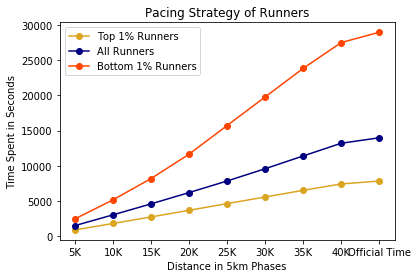

In [6]:
#Line Graph No.1: "Pacing Strategy of Runners", measured by seconds spent
plt.plot(x_axis, combine_top, marker ='o', color='goldenrod', label="Top 1% Runners")
plt.plot(x_axis, combine_average, marker ='o', color='navy', label="All Runners")
plt.plot(x_axis, combine_bottom, marker ='o', color='orangered', label="Bottom 1% Runners")
plt.legend(loc="upper left")
plt.title("Pacing Strategy of Runners")
plt.xlabel("Distance in 5km Phases")
plt.ylabel("Time Spent in Seconds")
plt.savefig("Images/Pacing Strategy of Runners.png")
plt.show()
